# Implementing an image compressor

You will need to install the following commands and enable ipywidgets

In [2]:
!pip install scikit-image
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [52]:
# start by importing some necessary packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy.linalg as la

## Problem 6 [Hw4] Overview
We will apply low rank approximation to bender in a different way than we did in the class example. And you will apply this code and interactive widget to another image of your choosing. 

#### Part a
For bender.png, what is a reasonable approximation of the rank to get nearly lossless image reconstruction? Submit in your pdf an image of bender next to the image you reconstructed with the chosen rank.

#### Part b.
For you selected image, what is a reasonable approximation of the rank to get nearly lossless image reconstruction? Submit in your pdf an the original image you chose next to the image you reconstructed with the chosen rank.

## What to turn in
Print the pdf of the notebook and attach it to your pdf that you upload for your homework. The images can be in the printed pdf or you can save them and attach them as part of a written solution for this problem. You must also upload your ipynb. 

### Part a

We read in a test image and convert to a $[0,1]$ scale before performing any arithmetic.

Image dimensions: (672, 552, 4)


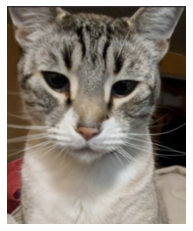

In [120]:
im = imread("./bender.png")
im = im.astype(float)/255.
print("Image dimensions:",im.shape)

plt.imshow(im)
plt.axis('off')
plt.show()

Next, we vertically stack the color channels to form a $3m\times{n}$ image, where the $n$ columns of the image represent our samples, and center the image about its mean to obtain the matrix $A$.

#### Part a.1
Below, compute the mean of each row to obtain the column mean. Store this in variable `Sm`.  Make sure to pass to the `np.mean` function the argument `keepdims=True`. Then use `Sm` to create the centered matrix $A=S-S_m$. 

In [121]:
m,n,p = im.shape
S = np.vstack([im[:,:,0],im[:,:,1],im[:,:,2]])

Sm = np.mean(S, axis=0)# compute the mean of each row to obtain a mean column.

A = S - Sm # compute the centered matrix A.

#### Part a.2
With your group, please write a function ```rank_approx(A, k)``` which accepts a centered matrix $A$ and a maximum rank $k$, and assembles a list $L$ of the first $k$ rank-one matrices in the low-rank approximation of the matrix. The list $L$ should be of the form
$$
L = [\sigma_1 u_1 v_1^T, \sigma_2 u_2 v_2^T, ..., \sigma_k u_k v_k^T]
$$
Return the list as your output.

In [122]:
def rank_approx(A, k):
    L = []
    U, sigs, VH = la.svd(A, compute_uv = True)
    V = np.transpose(VH)
    for i in range(k):
        ui = U[:, i]
        vi = V[:, i]
        ui = np.reshape(ui, (len(ui), 1))
        vi = np.reshape(vi, (len(vi), 1))
        vi = np.transpose(vi)
        L.append(np.dot(sigs[i]*ui, vi))
    return L

print(np.shape(A))
L=rank_approx(A,3)

(2016, 552)


### Part a.3
Create the function ```reconstruct(L, r, Sbar)``` below such that it accepts as inputs:
- the list of low-rank approximations $L$, 
- a target rank $r < k$, and 
- the column mean $\bar{S}$, 

And returns 
- the rank-$r$ reconstructed image. 

If your ```rank_approx``` function is set up correctly, you should be able to run the following cell and plot a test reconstruction:

Ran rank
Ran reconstruct


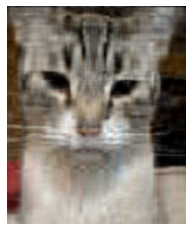

In [123]:
def reconstruct(L, r, Sbar):
    if r >= len(L):
        print("Error: r must be less than the length of L.")
        return

    m = len(Sbar)//3 # the leading dimension of a single channel

    
    Ar = np.zeros(L[0].shape) 
    # Reconstruct the original image up to rank j.
    for i in range(r):
        Ar = Ar + L[i]

    Ar += Sbar # Add back the mean Sbar and reshape into m by n by p. 

    m = Ar.shape[0]//3

    imr = np.stack([Ar[:m,:],Ar[m:2*m,:],Ar[2*m:,:]], axis=2)
    
    # truncate values and return the reconstructed image.
    imr[imr<0] = 0; imr[imr>1] = 1
    imr = imr.real
    return imr

# Run a test:
k = 16; r = 12
print("Ran rank")
L = rank_approx(A, k)
print("Ran reconstruct")
imr = reconstruct(L, r, Sm)

plt.imshow(imr)
plt.axis("off")
plt.show()

#### part a.4
Given the above code works, you can now run this cool little widget to visualize bender at different target values of $k$. 
Decide how many singular vectors you feel are necessary to reconstruct the image before differences between the original become imperceptible.

Provide an plot of this reconstructed image next to the original. 

In [124]:
import ipywidgets as widgets
from ipywidgets import interactive

rmax = min(80,n)
L = rank_approx(A, rmax+1)
rank_slider = widgets.IntSlider(
    value=1, min=1, max=rmax, step=1,
    description='rank:', continuous_update=False)

def rank_slider_plot(r = 1):
    plt.close()
    imr = reconstruct(L, r, Sm)

    # Plot the original and compressed images.
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
    ax1.imshow(im)
    ax1.set_title("original", size=16)
    ax1.axis("off")

    ax2.imshow(imr)
    ax2.set_title("reconstruction", size=16)
    ax2.axis("off")
    plt.show()

interactive_plot = interactive(rank_slider_plot, r=rank_slider)
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(IntSlider(value=1, continuous_update=False, description='rank:', max=80, min=1), Output(…

## Part b
Now find an image online or select one of your own images, and apply the above code to that image. Determine an appropriate target rank to reconstruct the image and provide a plot of the original next to the reconstructed image as you did in part a.

Compare the target ranks to reconstruct the images in part a and b. Are they similar?

Image dimensions: (550, 900, 3)


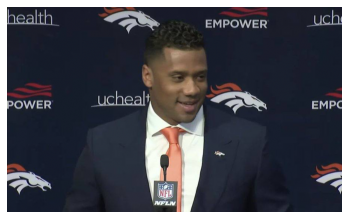

Ran rank
Ran reconstruct


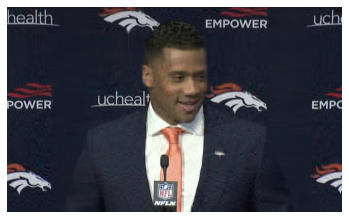

In [129]:
## enter your code here
im = imread("./russ_bronco.jpg")
im = im.astype(float)/255.
print("Image dimensions:",im.shape)

plt.imshow(im)
plt.axis('off')
plt.show()

m,n,p = im.shape
S = np.vstack([im[:,:,0],im[:,:,1],im[:,:,2]])
Sm = np.mean(S, axis=0)# compute the mean of each row to obtain a mean column.
A = S - Sm # compute the centered matrix A.

# Run a test:
k = 60; r = 59
print("Ran rank")
L = rank_approx(A, k)
print("Ran reconstruct")
imr = reconstruct(L, r, Sm)

plt.imshow(imr)
plt.axis("off")
plt.show()

I used a target rank of 60, and I see that it is less than the target rank of 80 used in the previous part. This may be due to the fact that there is a greater variety of pixels in the picture I used.

## Supplementary Material: Image Compression with PCA
You can also do image compression and reconstruction with PCA. Below you can see how using `scikit-learn`. The cool thing is that you can plot the explained variance and use that to pick a reasonable target value for $k$. 



(2016, 552)


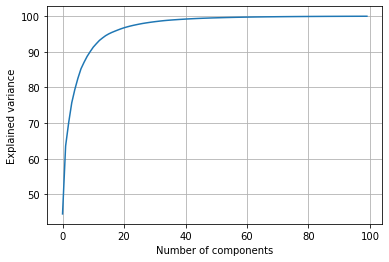

<Figure size 432x288 with 0 Axes>

In [128]:
import numpy as np
from sklearn.decomposition import PCA
pca_100=PCA(n_components=100)
pca_100.fit(S)
plt.grid()
plt.plot(np.cumsum(pca_100.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

n_components=20
pca_ = PCA(n_components=n_components)
bender_reduced = pca_.fit_transform(S)
bender_recovered = pca_.inverse_transform(bender_reduced)
print(np.shape(bender_recovered))

plt.figure()
m = len(Sm)//3
Ar_ = bender_recovered 
imr = np.stack([Ar_[:m,:],Ar_[m:2*m,:],Ar_[2*m:,:]], axis=2)
plt.imshow(imr, cmap='gray_r')
plt.title('Compressed image with {} components'.format(n_components), fontsize=15, pad=15)
plt.savefig("image_pca.png")